<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction

Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones.

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage.

Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

<a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">Spacex DataSet</a>


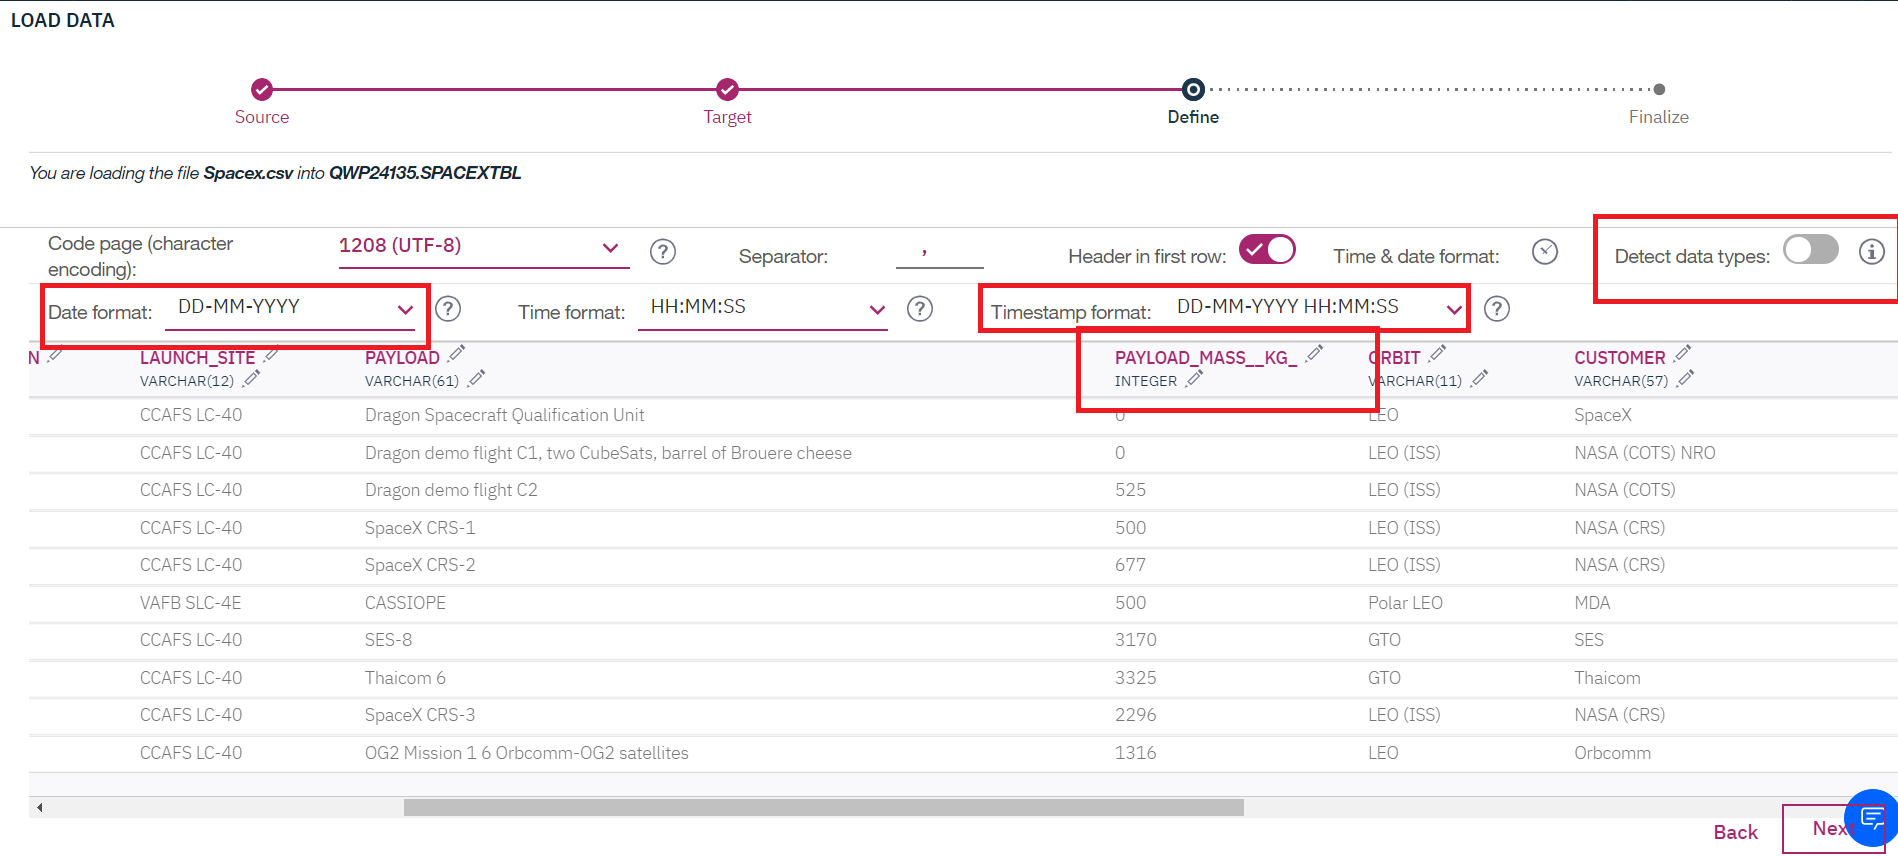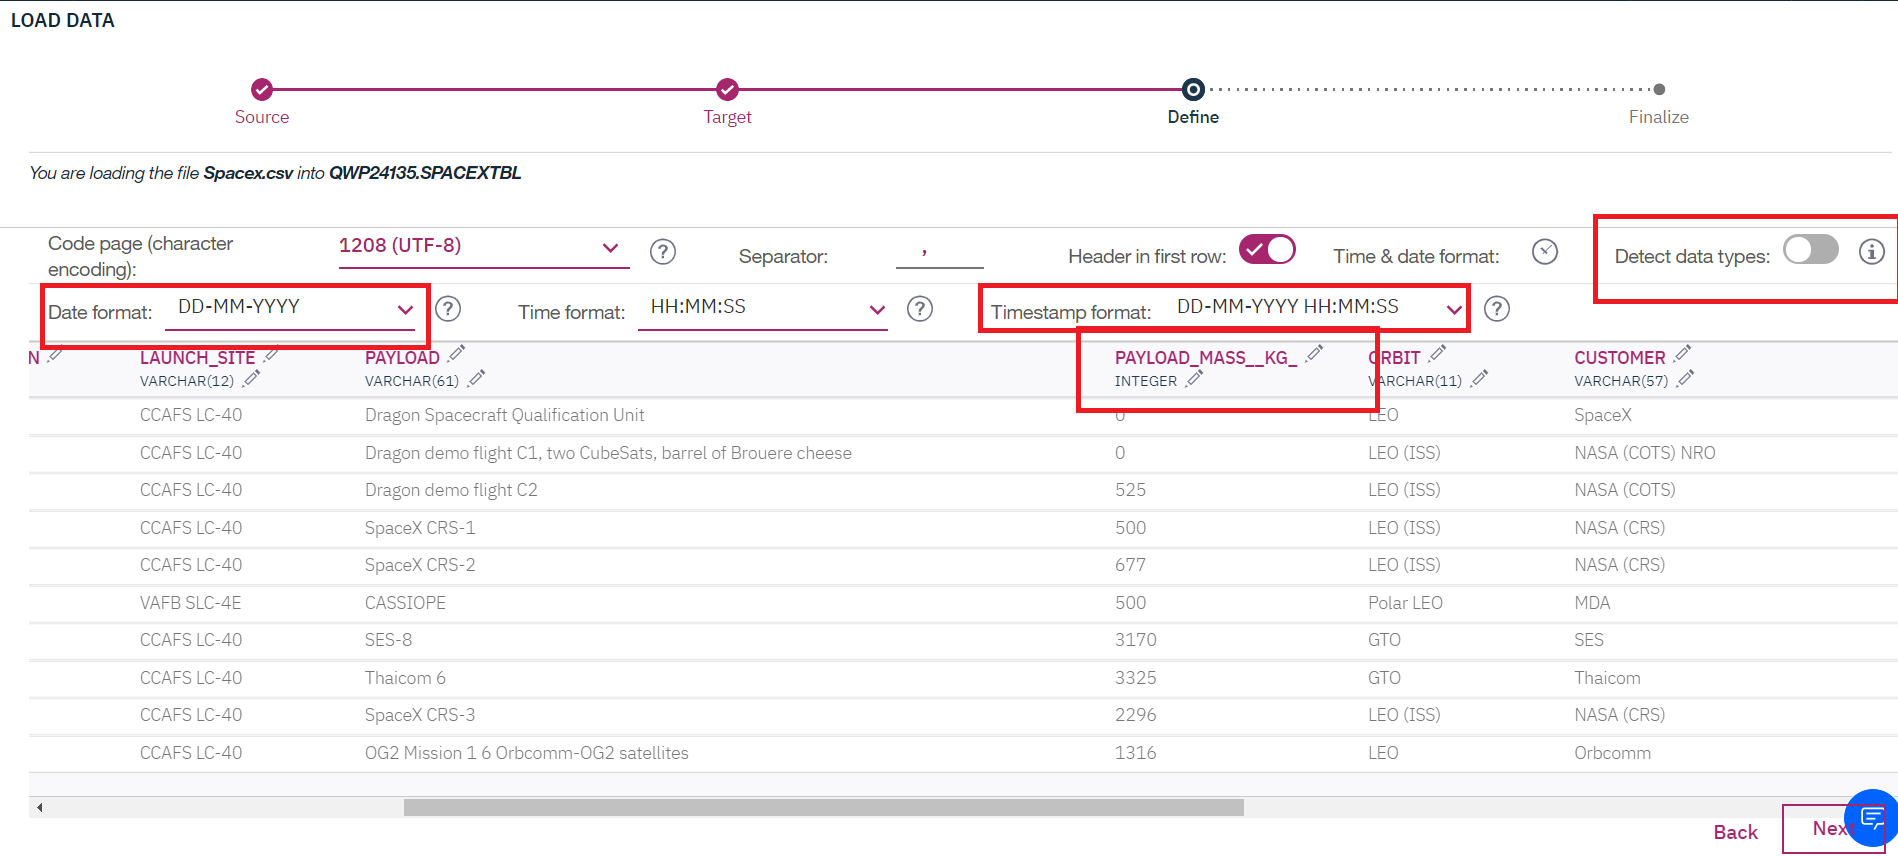### Store the dataset in database table

**it is highly recommended to manually load the table using the database console LOAD tool in DB2**.

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload.png">

Now open the Db2 console, open the LOAD tool, Select / Drag the .CSV file for the  dataset, Next create a New Table, and then follow the steps on-screen instructions to load the data. Name the new table as follows:

**SPACEXDATASET**

**Follow these steps while using old DB2 UI which is having Open Console Screen**

**Note:While loading Spacex dataset, ensure that detect datatypes is disabled. Later click on the pencil icon(edit option).**

1.  Change the Date Format by manually typing DD-MM-YYYY and timestamp format as DD-MM-YYYY HH\:MM:SS

2.  Change the PAYLOAD_MASS\_\_KG\_  datatype  to INTEGER.

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload2.png">


**Changes to be considered when having DB2 instance with the new UI having Go to UI screen**

*   Refer to this insruction in this <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sign%20up%20for%20IBM%20Cloud%20-%20Create%20Db2%20service%20instance%20-%20Get%20started%20with%20the%20Db2%20console/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">link</a> for viewing  the new  Go to UI screen.

*   Later click on **Data link(below SQL)**  in the Go to UI screen  and click on **Load Data** tab.

*   Later browse for the downloaded spacex file.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/browsefile.png" width="800"/>

*   Once done select the schema andload the file.

 <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload3.png" width="800"/>


In [9]:
!pip install sqlalchemy==1.3.9


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [10]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [11]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [12]:
!pip install -q pandas==1.1.5

In [13]:
%sql sqlite:///my_data1.db

'Connected: @my_data1.db'

In [14]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
For Example "Landing_Outcome"**

### Task 1

##### Display the names of the unique launch sites  in the space mission


In [19]:
%sql SELECT DISTINCT LAUNCH_SITE FROM SPACEXTBL

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


### Task 2

##### Display 5 records where launch sites begin with the string 'CCA'


In [21]:
%sql SELECT * FROM SPACEXTBL WHERE LAUNCH_SITE LIKE "CCA%" LIMIT 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing _Outcome
04-06-2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
08-12-2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
22-05-2012,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
08-10-2012,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
01-03-2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3

##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [41]:
%sql SELECT SUM(PAYLOAD_MASS__KG_) AS NASA_PAYLOAD FROM SPACEXTBL WHERE Customer = "NASA (CRS)"

 * sqlite:///my_data1.db
Done.


NASA_PAYLOAD
45596


### Task 4

##### Display average payload mass carried by booster version F9 v1.1


In [43]:
%sql SELECT (SUM(PAYLOAD_MASS__KG_)/COUNT(BOOSTER_VERSION)) as "Average of F9 v1.1" FROM SPACEXTBL WHERE BOOSTER_VERSION = 'F9 v1.1'

 * sqlite:///my_data1.db
Done.


Average of F9 v1.1
2928


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.

*Hint:Use min function*


In [45]:
%sql SELECT MIN(DATE) as First_Success FROM SPACEXTBL WHERE MISSION_OUTCOME = "Success"

 * sqlite:///my_data1.db
Done.


First_Success
01-03-2013


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [70]:
%sql SELECT BOOSTER_VERSION FROM SPACEXTBL WHERE "LANDING _OUTCOME" = "Success (drone ship)" AND PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### Task 7

##### List the total number of successful and failure mission outcomes


In [71]:
%sql SELECT MISSION_OUTCOME, COUNT(MISSION_OUTCOME) FROM SPACEXTBL GROUP BY MISSION_OUTCOME

 * sqlite:///my_data1.db
Done.


Mission_Outcome,COUNT(MISSION_OUTCOME)
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


### Task 8

##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [72]:
%sql SELECT BOOSTER_VERSION FROM SPACEXTBL WHERE PAYLOAD_MASS__KG_=(SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL)

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


### Task 9

##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 4, 2) as month to get the months and substr(Date,7,4)='2015' for year.**


In [84]:
%sql SELECT substr(Date,4,2) AS MONTH, "Landing _Outcome", BOOSTER_VERSION, LAUNCH_SITE FROM SPACEXTBL where substr(Date,7,4) = '2015' AND "Landing _Outcome" = "Failure (drone ship)"

 * sqlite:///my_data1.db
Done.


MONTH,Landing _Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


### Task 10

##### Rank the  count of  successful landing_outcomes between the date 04-06-2010 and 20-03-2017 in descending order.


In [86]:
%sql SELECT COUNT("LANDING _OUTCOMES") FROM SPACEXTBL WHERE DATE BET

 * sqlite:///my_data1.db
Done.


"COUNT(""LANDING _OUTCOMES"")"
101


### Reference Links

*   <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01&origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>

*   <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01&origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*   <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01&origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*   <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Hands-on Lab: Analyzing a real World Data Set</a>


## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


## Change log

| Date       | Version | Changed by    | Change Description        |
| ---------- | ------- | ------------- | ------------------------- |
| 2021-07-09 | 0.2     | Lakshmi Holla | Changes made in magic sql |
| 2021-05-20 | 0.1     | Lakshmi Holla | Created Initial Version   |


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
